In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.utils import shuffle
import pickle
from sklearn.metrics import accuracy_score



In [101]:
#vidcap = cv2.VideoCapture('drive/My Drive/Fold5_part2/' + str(j) +'/' + str(i) + '.mp4')
data = []
#NTHU_df = pd.DataFrame(data, columns=['ear', 'mar'])


persons = [] 
accuracies = []



for i in range(15,19):
    d_raw = pd.read_csv('Drowsy_mear_PA' + str(i) + '.csv',header=  None,index_col= None)
    nd_raw = pd.read_csv('NotDrowsy_mear_PA' + str(i) + '.csv',header=  None,index_col= None)
    
    
    
    # Drowsy Data
    
    # Raw Data format into required format
    d_data = []
    d_df = pd.DataFrame(d_data, columns=['ear', 'mar'])
    d_df['ear'] = d_raw.iloc[0,:]
    d_df['mar'] = d_raw.iloc[1,:]
    
    #d_df.to_csv('drowsy_PA' + str(i) + '.csv', index=False)
    
    
    
    #print(d_df)
    # Data Cleaning
    d_ear= d_df.iloc[:,0:1].values
    d_mar = d_df.iloc[:,1:].values
    
    d_n = math.ceil(len(d_ear)/7)
    
    d_ear_a = np.array_split(d_ear, d_n)
    d_mar_a = np.array_split(d_mar, d_n)
    
    d_ear_c = []
    for j in d_ear_a:
        ear_j = np.amin(j)
        d_ear_c.append(ear_j)
        
    d_mar_c = []
    for j in d_mar_a:
        mar_j = np.amax(j)
        d_mar_c.append(mar_j)
        
    d_dc = pd.DataFrame(
    {'ear': d_ear_c,
     'mar': d_mar_c,
    })
    
    #d_dc.to_csv('drowsy_cleaned_PA' + str(i) + '.csv', index=False)
    
    
    
    # Not Drowsy Data
    
    nd_data = []
    nd_df = pd.DataFrame(nd_data, columns=['ear', 'mar'])
    nd_df['ear'] = nd_raw.iloc[0,:]
    nd_df['mar'] = nd_raw.iloc[1,:]
    
    #nd_df.to_csv('notdrowsy_PA' + str(i) + '.csv', index=False)
    

    
     # Data Cleaning
    nd_ear= nd_df.iloc[:,0:1].values
    nd_mar = nd_df.iloc[:,1:].values
    
    nd_n = math.ceil(len(nd_ear)/7)
    
    nd_ear_a = np.array_split(nd_ear, nd_n)
    nd_mar_a = np.array_split(nd_mar, nd_n)
    
    nd_ear_c = []
    for j in nd_ear_a:
        ear_j = np.amax(j)
        nd_ear_c.append(ear_j)
        
    nd_mar_c = []
    for j in nd_mar_a:
        mar_j = np.amin(j)
        nd_mar_c.append(mar_j)
        
    nd_dc = pd.DataFrame(
    {'ear': nd_ear_c,
     'mar': nd_mar_c,
    })
    
    #nd_dc.to_csv('notdrowsy_cleaned_PA' + str(i) + '.csv', index=False)
    
    
    d_dc['target'] = d_dc.apply(lambda x: math.ceil(x['ear']), axis=1)
    nd_dc['target'] = nd_dc.apply(lambda x: math.floor(x['ear']), axis=1)
    
    tf = pd.concat([d_dc,nd_dc],ignore_index= True)
    tf = shuffle(tf)
    tf.reset_index(drop=True, inplace=True)
    
    
    #Testing the model for independent data
    
    # Loading the trained knn model
    filename = 'knn_model.sav'
    model_knn = pickle.load(open(filename, 'rb'))
    
    
    #Shaping the input features for predictions
    # Input and output datas:
    x = tf.drop('target', axis =1)
    y = tf['target']
    
    
    # Making the predictions of testing data
    predictions = model_knn.predict(x)
    
    
    # Calculating the precision of the model for independent data predictions
    
    #print(accuracy_score(y,predictions))
    
    
    # making the list
    
    persons.append(i-14)
    
    
    accuracies.append(100*accuracy_score(y,predictions))
    

    
    
#     

In [102]:
persons

[1, 2, 3, 4]

In [103]:
accuracies

[87.09677419354838, 96.875, 97.5609756097561, 86.8421052631579]

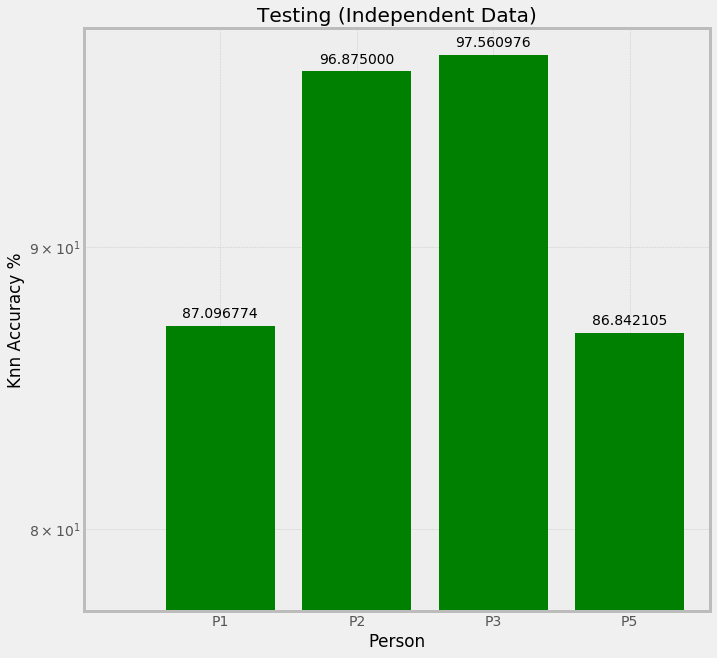

In [122]:
plt.figure(figsize=(10,10))


plt.semilogy()
plot = plt.bar(persons, accuracies, color='green') #, marker='o', color='r')
plt.style.use('bmh')

# for printing height 
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
          1.002*height,'%f' % float(height), ha='center', va='bottom', color='black')
    

plt.title('Testing (Independent Data)', color='black')    
plt.xlabel('Person',Color='Black')
plt.ylabel('Knn Accuracy %', color='black')
plt.xticks(np.arange(5), ('', 'P1', 'P2', 'P3', 'P5'))
plt.grid(axis='both', which='both', alpha=0.6)
#(df_total['model'],df_total['accuracy'], marker='o', color='r')
plt.savefig('Testing Comparison(Idnpt).jpg',bbox_inches='tight')
plt.show()